In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm   # regression

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sonww\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('ActiveETFs_Data.csv')

In [3]:
df.head()

,Date,Market,Risk Free,Mpremium,Small,Big,SMB,High B/M,Low B/M,HML,Winner,Loser,MOM
0,192701,0.14,0.25,-0.11,1.22,1.33,-0.11,4.41,-0.52,4.92,0.05,-0.19,0.23
1,192702,4.58,0.26,4.32,5.73,5.38,0.35,7.25,4.08,3.17,4.94,6.48,-1.54
2,192703,0.62,0.30,0.32,-2.14,-0.27,-1.87,-3.00,-0.08,-2.92,-0.22,-3.45,3.23
3,192704,0.66,0.25,0.41,1.20,0.76,0.44,2.32,0.99,1.33,2.69,-1.59,4.28
4,192705,5.69,0.30,5.39,6.34,5.94,0.40,8.51,5.76,2.75,7.16,3.82,3.34


In [8]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(str(x), format= '%Y%m'))

In [9]:
df.set_index('Date', inplace = True)

In [12]:
test = df.reset_index()

In [15]:
test['month'] = test['Date'].apply(lambda x: x.month)

In [18]:
q2 = test.groupby(['month']).mean()

In [24]:
q2result = q2[['Mpremium', 'SMB','HML','MOM']]

In [25]:
q2result

,Mpremium,SMB,HML,MOM
month,,,,
1,1.275783,2.442289,2.404819,-1.629880
2,0.149036,0.615904,0.187229,1.219398
3,0.348072,0.155904,0.224578,1.213855
4,1.030361,-0.082048,1.178675,0.264940
5,0.345422,0.473133,0.090241,0.488554
6,0.641928,-0.117470,-0.095181,1.264458
7,1.159639,-0.240602,1.073012,-0.120241
8,1.077470,0.070843,0.507711,-0.258313
9,-1.152651,0.368675,-0.315060,1.109639


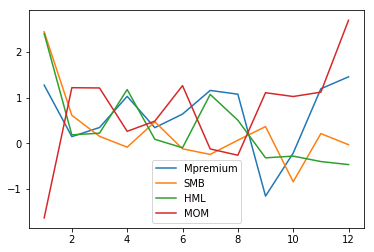

In [29]:
plt.plot(q2result)
plt.legend(q2result.columns)

In [30]:
def cumretfunc(df): 
    v=(df.prod())-1
    return v

In [32]:
fdf = df[['Mpremium', 'SMB','HML','MOM']]

In [35]:
cumdf = 1+ fdf/100

In [40]:
cumdf.head()

,Mpremium,SMB,HML,MOM
Date,,,,
1927-01-01,0.9989,0.9989,1.0492,1.0023
1927-02-01,1.0432,1.0035,1.0317,0.9846
1927-03-01,1.0032,0.9813,0.9708,1.0323
1927-04-01,1.0041,1.0044,1.0133,1.0428
1927-05-01,1.0539,1.0040,1.0275,1.0334


In [41]:
cumdf = cumdf.cumprod()

In [44]:
cumdf.tail()

,Mpremium,SMB,HML,MOM
Date,,,,
2009-08-01,87.210275,7.402185,15.705354,275.175269
2009-09-01,91.152180,7.613887,15.796445,261.499058
2009-10-01,88.563458,7.298672,15.527906,268.454933
2009-11-01,93.647000,7.070954,15.512378,269.582443
2009-12-01,96.381493,7.473998,15.487558,277.508167


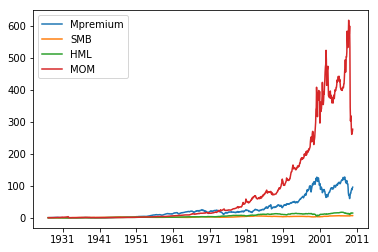

In [46]:
plt.plot(cumdf)
plt.legend(cumdf.columns)

In [50]:
percentdf = fdf/100

In [51]:
X = percentdf['Mpremium']
X1 = sm.add_constant(X)
y = percentdf['SMB']
#slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
Wregression = sm.OLS(y,X1).fit()
Wregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SMB   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.19e-28
Time:                        19:53:09   Log-Likelihood:                 2061.7
No. Observations:                 996   AIC:                            -4119.
Df Residuals:                     994   BIC:                            -4110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.001      1.333      0.183      -0.001       0.003
Mpremium       0.2017      0.018     11.401      0.000       0.167       0.236
==============================================================================
Omnibus:                      439.089   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10452.858
Skew:                           1.467   Prob(JB):                         0.00
Kurtosis:                      18.597   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X = percentdf['Mpremium']
X1 = sm.add_constant(X)
y = percentdf['HML']
#slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
Wregression = sm.OLS(y,X1).fit()
Wregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HML   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     59.57
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.87e-14
Time:                        19:53:31   Log-Likelihood:                 1888.6
No. Observations:                 996   AIC:                            -3773.
Df Residuals:                     994   BIC:                            -3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.001      2.106      0.035       0.000       0.005
Mpremium       0.1625      0.021      7.718      0.000       0.121       0.204
==============================================================================
Omnibus:                      284.195   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3700.092
Skew:                           0.925   Prob(JB):                         0.00
Kurtosis:                      12.259   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X = percentdf['Mpremium']
X1 = sm.add_constant(X)
y = percentdf['MOM']
#slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
Wregression = sm.OLS(y,X1).fit()
Wregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MOM   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.23e-29
Time:                        19:53:46   Log-Likelihood:                 1667.4
No. Observations:                 996   AIC:                            -3331.
Df Residuals:                     994   BIC:                            -3321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.001      6.120      0.000       0.006       0.012
Mpremium      -0.3055      0.026    -11.625      0.000      -0.357      -0.254
==============================================================================
Omnibus:                      528.309   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9689.892
Skew:                          -2.004   Prob(JB):                         0.00
Kurtosis:                      17.746   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""